# Esercitazione 7

## Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

Tail correction per l'energia potenziale:
$$ \frac{\left< V_{LJ}\right>_{tail}}{N} = 8\pi \rho_{LJ}\varepsilon \bigl( \frac{1}{9r^9_{c(LJ)}} - \frac{1}{3r^3_{c(LJ)}}\bigr)  $$

Tail correction per la pressione:
$$ \frac{\left< W_{LJ}\right>_{tail}}{3N\varepsilon} = 32\pi \rho_{LJ} \bigl( \frac{1}{9r^9_{c(LJ)}} - \frac{1}{6r^3_{c(LJ)}}\bigr) $$

## Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

La simulazione deve essere portata all'equilibrio; tuttavia l'algoritmo di Metropolis è a temperatura costante, dunque per controllare che l'equilibrio sia stato raggiunto si controlla se l'energia interna per particella oscilli attorno ad un valore stabile.
Il valore del parametro delta è stato fissato in modo che il tasso di accettazione delle mosse dell'algoritmo di Metropolis fosse circa 50%. Per il solido, delta=0.12, per il liquido 0.2, per il gas 4.2.
Di seguito vengono mostrati i dati ottenuti per l'energia interna istantanea usando 2000 mosse Monte Carlo (2000 blocchi da un passo ciascuno). 

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

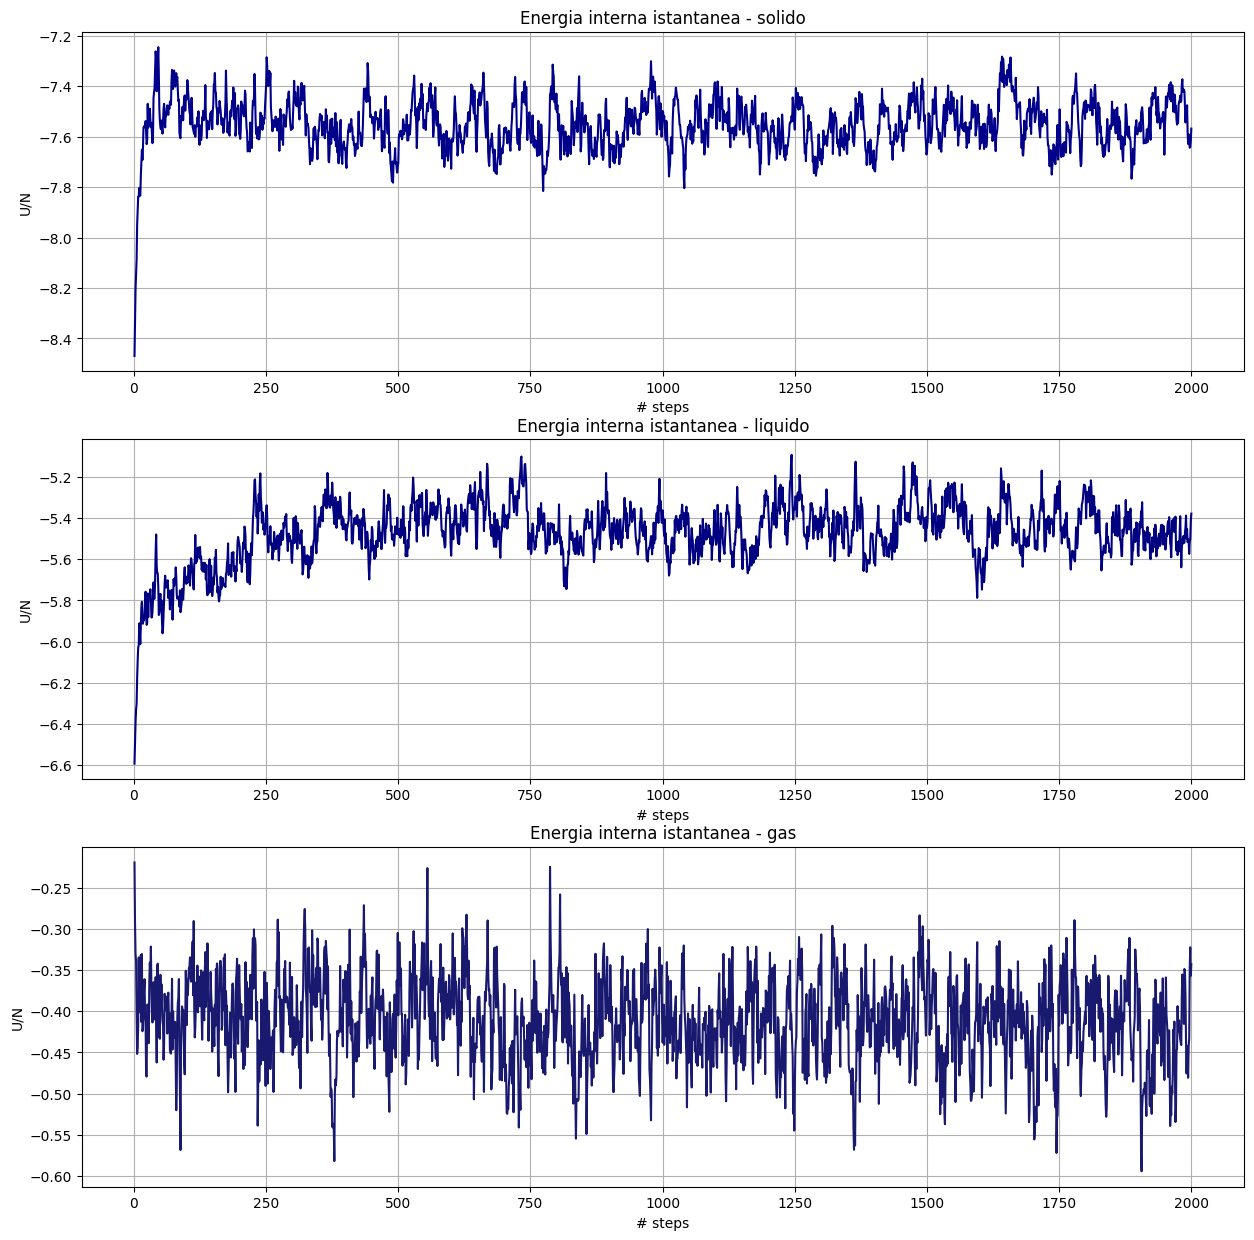

In [ ]:
name = ["output_equilibrium_solid.out", "output_equilibrium_liquid.out", "output_equilibrium_gas.out"]
title = ["Energia interna istantanea - solido", "Energia interna istantanea - liquido", "Energia interna istantanea - gas"]
y_label = "U/N"
x_label = "# steps"
color = ["darkblue", "navy", "midnightblue"]

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for i in range(3): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].plot(data[:,0], data[:,1], color=color[i])
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].grid(True)
    
plt.show()

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Espressione esplicita della funzione di autocorrelazione:

$$  \chi(t) = \frac{ \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t')m(t'+t) - \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t') \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t'+t)    }{ \frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m^2(t') - \bigl( \frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m(t')  \bigr)^2  }  $$

Ci si aspetta che l'autocorrelazione abbia un andamento di tipo esponenziale $ \chi(t) = e^{-t/t_c} $, dove $ t_c $ è il tempo di correlazione. 

La simulazione è stata riavviata dall'ultima configurazione dopo l'equilibrazione per produrre i dati dell'energia istantanea richesti, per un totale di $10^5$ step MC.

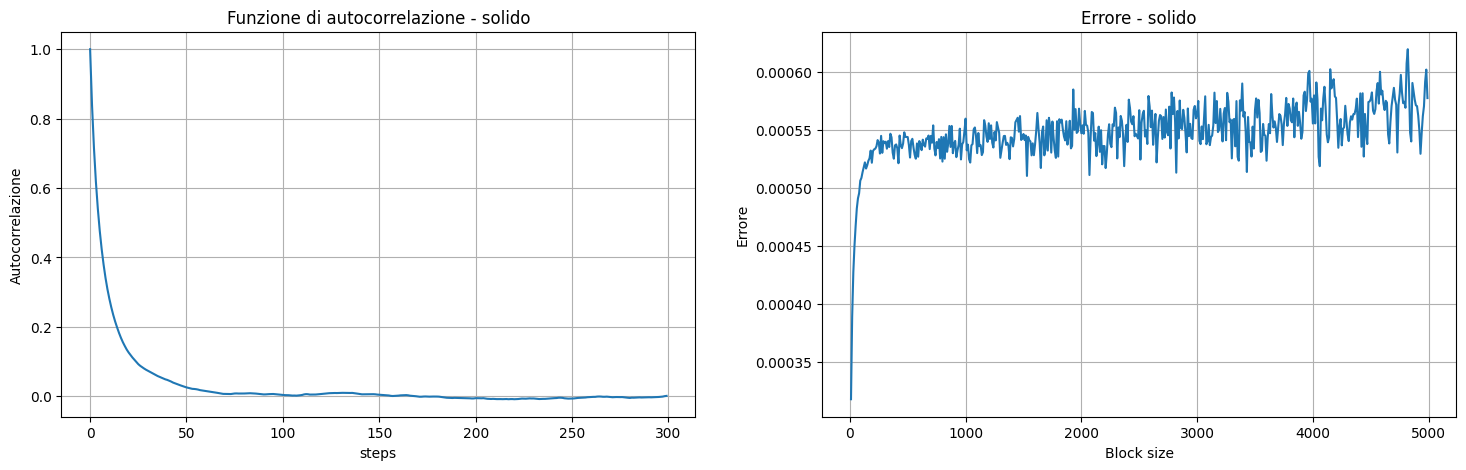

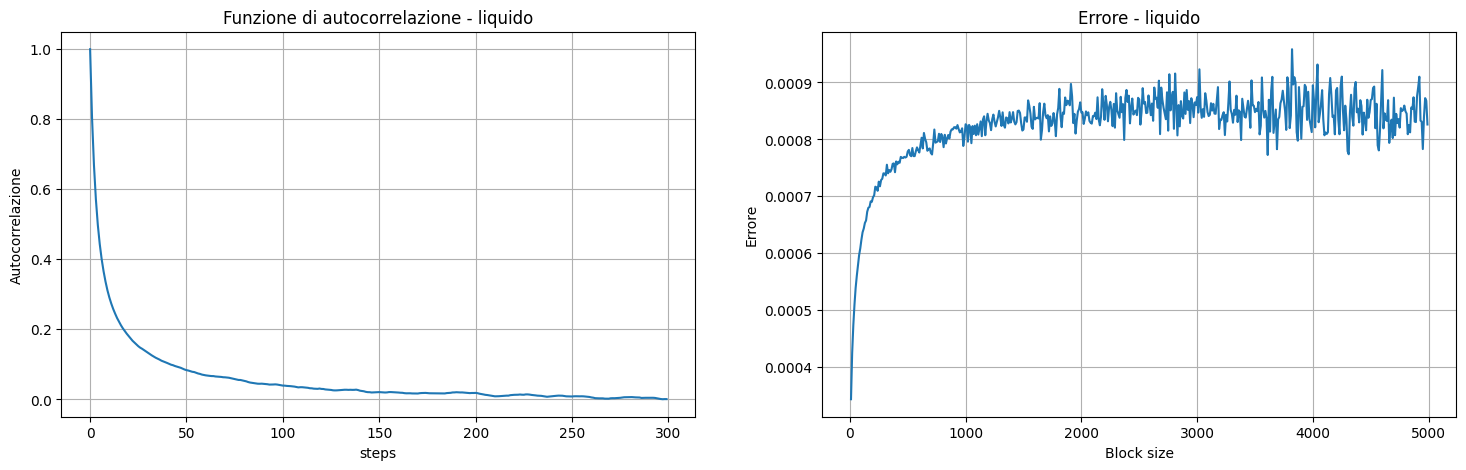

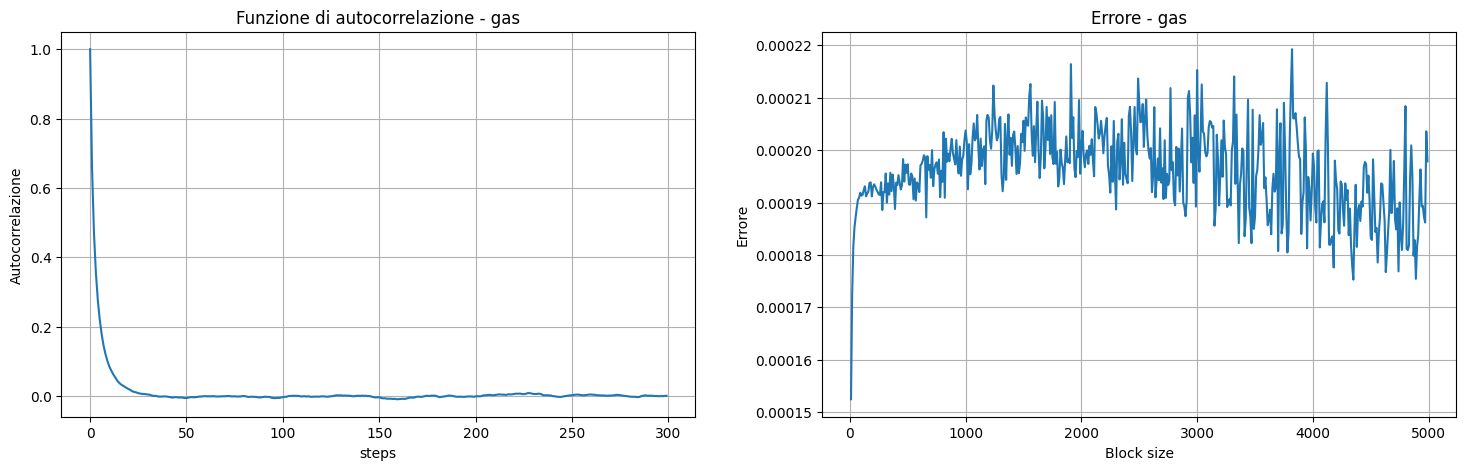

In [2]:
name = ["output_instant_solid.out", "output_instant_liquid.out", "output_instant_gas.out"]
title2 = ["Errore - solido", "Errore - liquido", "Errore - gas"]
title1 = ["Funzione di autocorrelazione - solido", "Funzione di autocorrelazione - liquido", "Funzione di autocorrelazione - gas"]
y_label = ["Autocorrelazione", "Errore"]
x_label = ["steps", "Block size"]
xlines = [1000,200,100]
throws=500000              # Total number of throws
    
def autocorr(data, t):       ####### Autocorrelation function
    
    t_max = len(data)
    sum4 = np.sum(data**2)
    sum5 = np.sum(data)
    denom = sum4/t_m  -  (sum5/t_m)**2
    
    sum1=np.sum(data[:int(t_max-t)]*data[t:])
    sum2=np.sum(data[:int(t_max-t)])
    sum3=np.sum(data[t:])
    
    result = ( sum1/(t_max - t) - (sum2 * sum3)/(t_max - t)**2 ) / denom 
    return result

def error(AV,AV2,n):  ######### Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

def blockerror(data, N, L) :      ####### N=numero di blocchi, L=numero di dati in un blocco
    
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    sum2_prog = np.zeros(N)
    
    for i in range(N):

        sum1 = 0
        for j in range(L):
            k = j+i*L
            sum1 += data[k]    
        ave[i] = sum1/L     # r_i 
        av2[i] = (ave[i])**2 # (r_i)^2 

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            sum2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        sum2_prog[i]/=(i+1) # Cumulative square average

    err = error(sum_prog,sum2_prog, N-1) # Statistical uncertainty
    
    return err

sizes = [10 * i for i in range(1,500)]

for i in range(3): 
    
    data = np.loadtxt( name[i] )
    t_m = len(data)
    x = [i for i in range(len(data-1))]
    times = [i for i in range(0,t_m)]
    
    auto = [autocorr(data, i) for i in range(0, 300)]
    errore = [blockerror(data, int(throws/j), j) for j in sizes]
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    
    axes[0].plot(times[:300], auto[:300]) 
    axes[0].set_title(title1[i], fontsize=12)
    axes[0].set_xlabel(x_label[0])
    axes[0].set_ylabel(y_label[0])
    axes[0].grid(True)
    
    axes[1].plot(sizes, errore) 
    axes[1].set_title(title2[i], fontsize=12)
    axes[1].set_xlabel(x_label[1])
    axes[1].set_ylabel(y_label[1])
    axes[1].grid(True)
    
plt.show()

Dai grafici dell'autocorrelazione si nota l'andamento esponenziale previsto. In particolare, l'autocorrelazione è praticamente nulla a partire da circa 100 step MC per il solido, 250 per il liquido, 50 per il gas. <br>
Non è raffigurata la funzione di autocorrelazione per tutti gli step MC: nella parte centrale la funzione oscilla molto vicino allo zero, mentre nella parte finale essa oscilla con un'ampiezza maggiore, dovuta al fatto che il limite superiore delle somme al numeratore dell'espressione della $\chi (t)$ diventano piccoli, dunque l'errore statistico dovuto alle fluttuazioni dell'energia interna istantanea può diventare grande anche per piccole variazioni. <br>
I grafici dell'errore in funzione della grandezza dei blocchi mostrano che da una certa grandezza in poi l'errore non varia di molto, continuando a oscillare. Queste oscillazioni possono anche essere grandi, tuttavia si nota un andamento del tipo $1-exp(-t)$ nella parte iniziale: l'errore satura e poi oscilla. La grandezza minima dei blocchi da usare in una simulazione è quella oltre la quale l'errore non varia regolarmente. Una grandezza dei blocchi oltre i 1500 dati è sufficiente per tutti e tre gli stati.

## Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

## Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

Le simulazioni sono state equilibrate allo stesso modo dell'esercitazione 4 per la dinamica molecolare, e con lo stesso numero di step per quelle MC. Successivamente sono state eseguite con 100 blocchi di 2000 step ciascuno.

### Solido

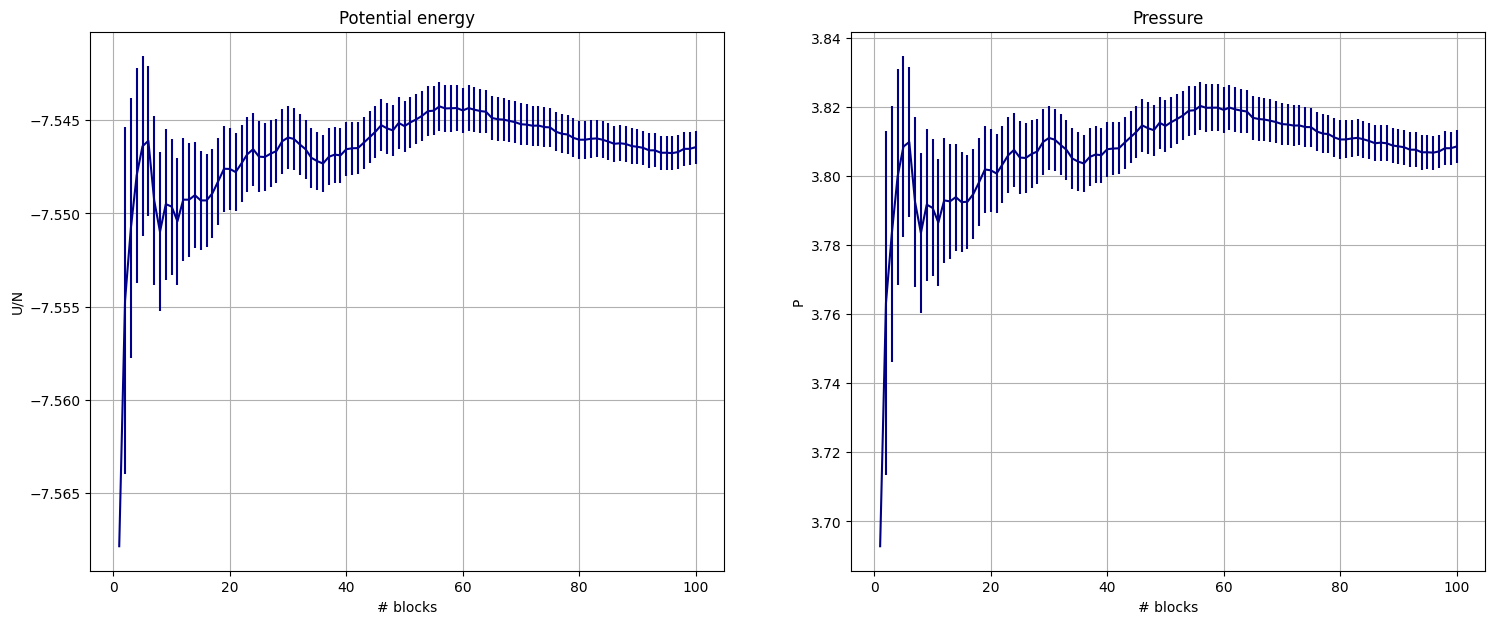

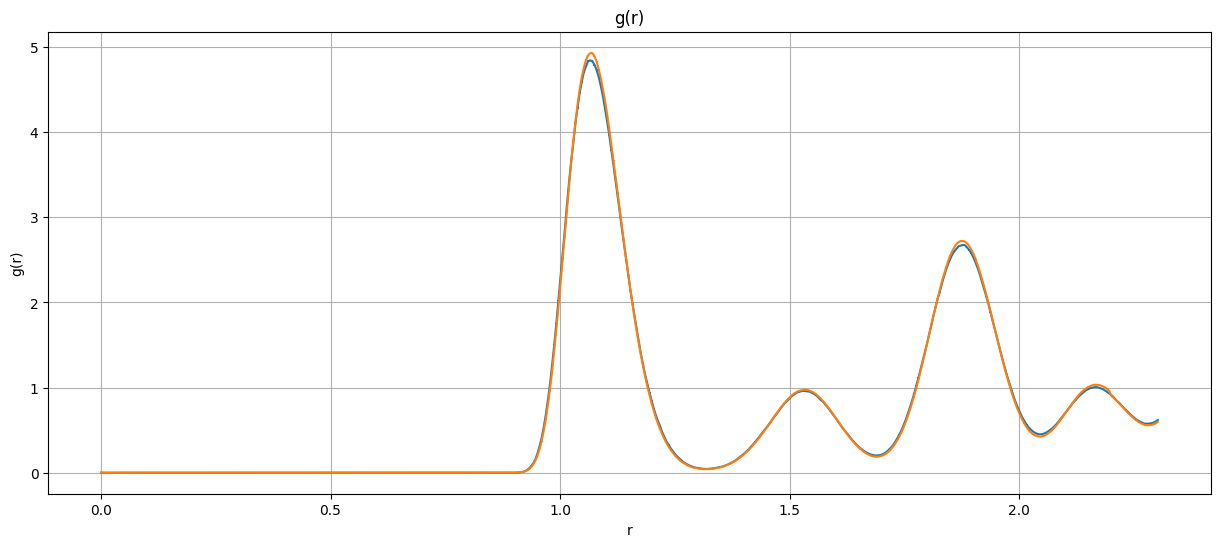

In [5]:
name = ["output_epot_solid.out", "output_pres_solid.out"]
title = ["Potential energy", "Pressure"]
y_label = ["U/N", "P"]
x_label = "# blocks"
color = ["darkblue", "navy"] 

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i])
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)

plt.show()

data_gdirmc=np.loadtxt("output_gdir_solid_MC.out")      # grafico gdir
data_gdirmd=np.loadtxt("output_gdir_solid_MD.out")

plt.figure(figsize=(15,6))
plt.errorbar(data_gdirmd[:,0], data_gdirmd[:,1], yerr=data_gdirmd[:,2])
plt.errorbar(data_gdirmc[:,0], data_gdirmc[:,1], yerr=data_gdirmc[:,2])
plt.title("g(r)")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)

plt.show()

### Liquido

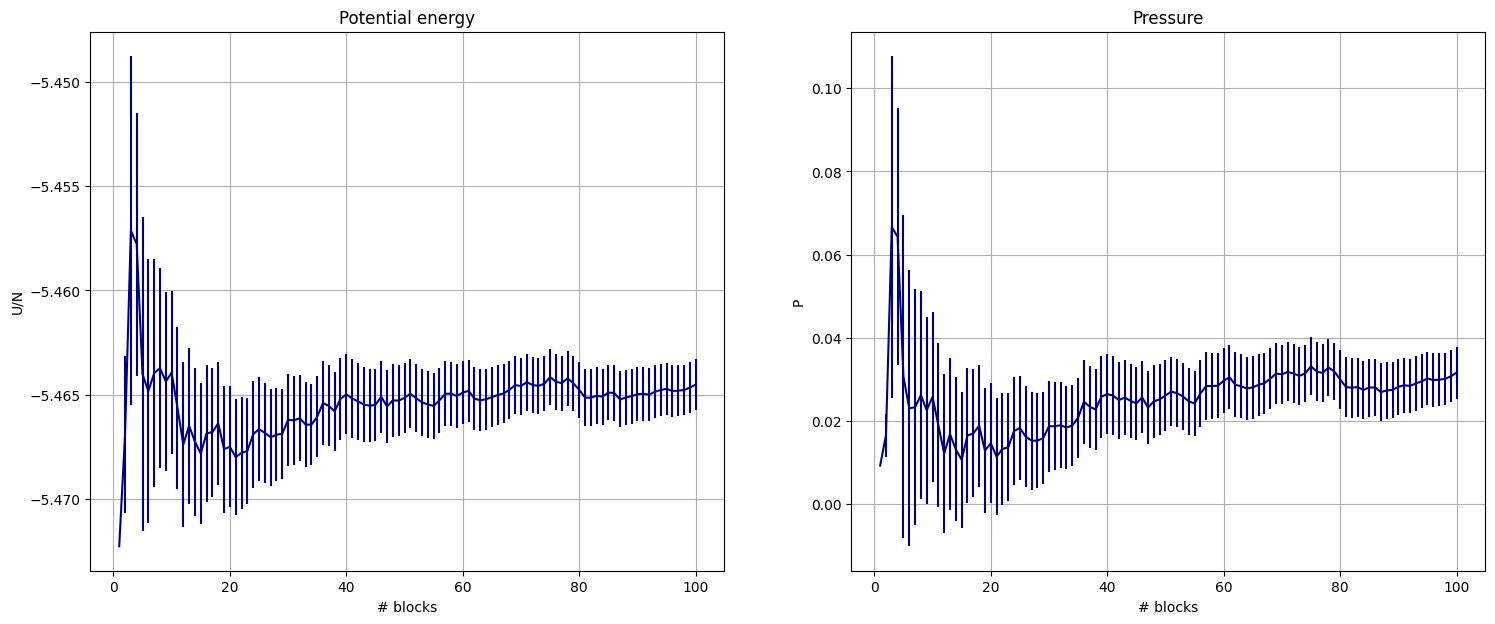

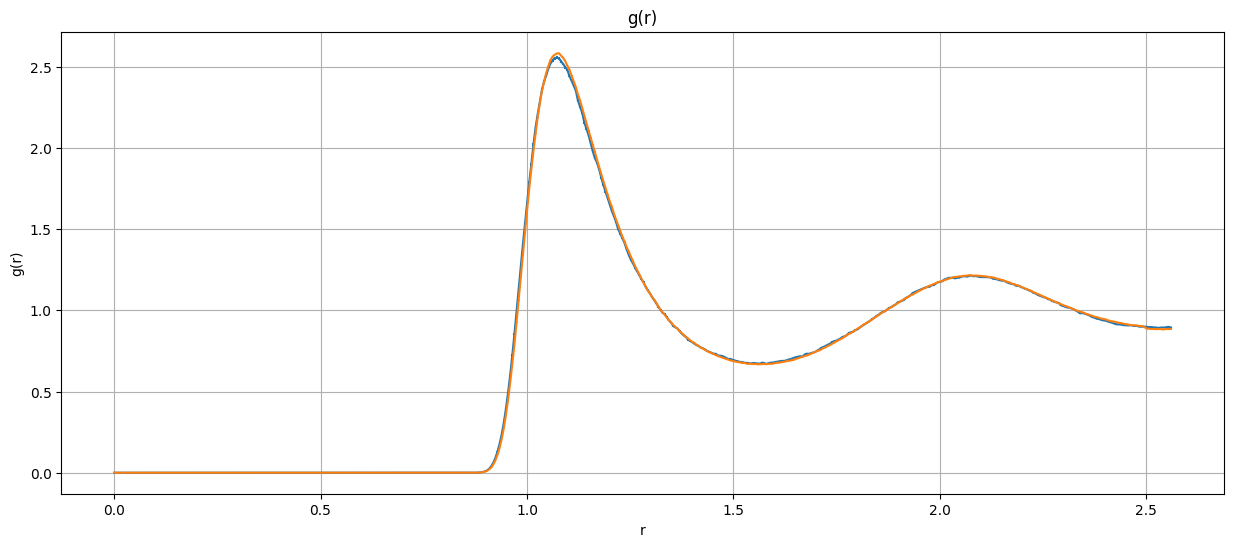

In [6]:
name = ["output_epot_liquid.out", "output_pres_liquid.out"]
title = ["Potential energy", "Pressure"]
y_label = ["U/N", "P"]
x_label = "# blocks"
color = ["darkblue", "navy"] 

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i])
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)

plt.show()

data_gdirmc=np.loadtxt("output_gdir_liquid_MC.out")      # grafico gdir
data_gdirmd=np.loadtxt("output_gdir_liquid_MD.out")

plt.figure(figsize=(15,6))
plt.errorbar(data_gdirmd[:,0], data_gdirmd[:,1], yerr=data_gdirmd[:,2])
plt.errorbar(data_gdirmc[:,0], data_gdirmc[:,1], yerr=data_gdirmc[:,2])
plt.title("g(r)")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)

plt.show()

### Gas

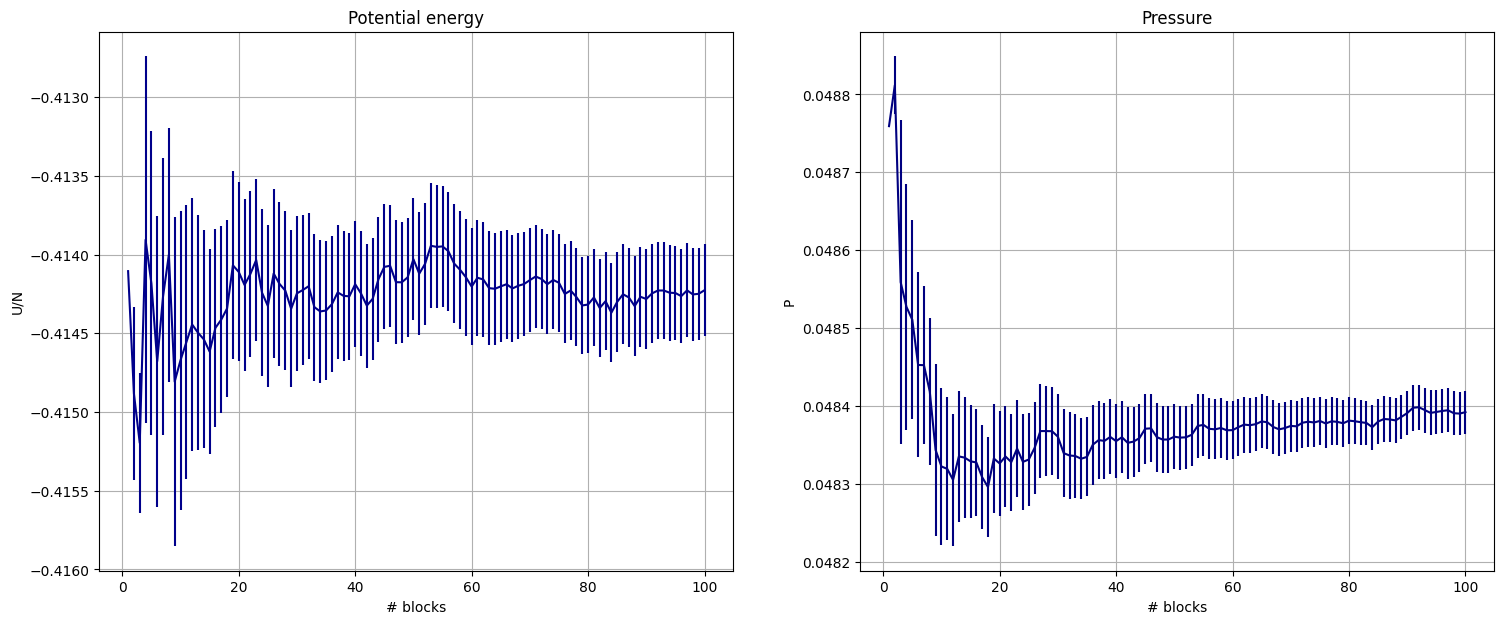

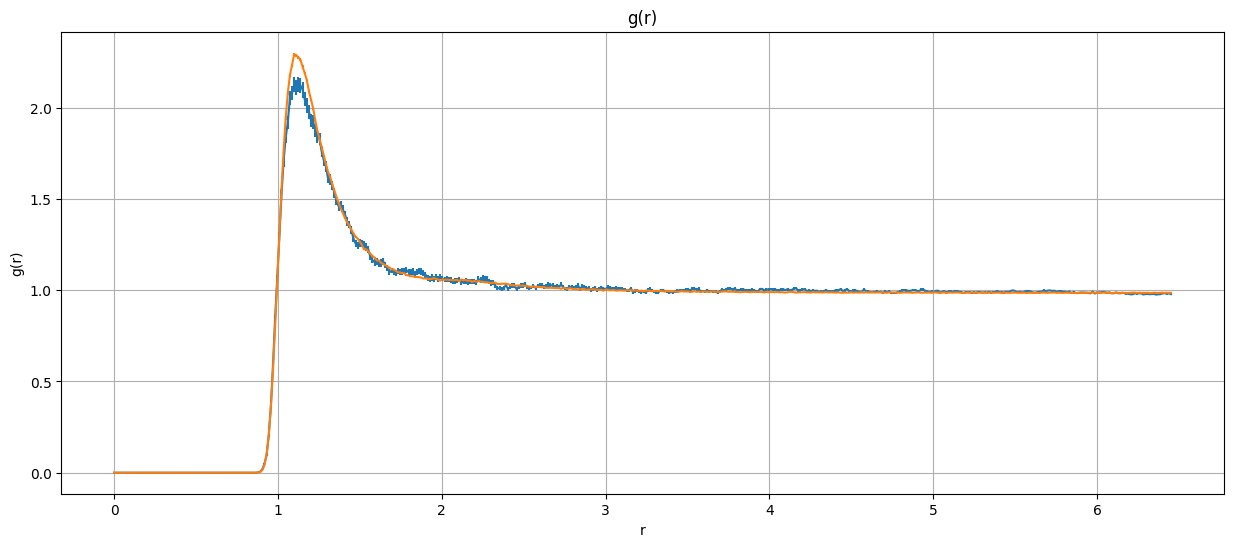

In [7]:
name = ["output_epot_gas.out", "output_pres_gas.out"]
title = ["Potential energy", "Pressure"]
y_label = ["U/N", "P"]
x_label = "# blocks"
color = ["darkblue", "navy"] 

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i])
    axes[i].set_title(title[i], fontsize=12)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label[i])
    axes[i].grid(True)

plt.show()

data_gdirmc=np.loadtxt("output_gdir_gas_MC.out")      # grafico gdir
data_gdirmd=np.loadtxt("output_gdir_gas_MD.out")

plt.figure(figsize=(15,6))
plt.errorbar(data_gdirmd[:,0], data_gdirmd[:,1], yerr=data_gdirmd[:,2])
plt.errorbar(data_gdirmc[:,0], data_gdirmc[:,1], yerr=data_gdirmc[:,2])
plt.title("g(r)")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)

plt.show()